In [76]:
import numpy as np
import pandas as pd

In [77]:
header = ["regression_name", "dataset", "poisoning_threshold", "dataset_size", "num_lookups", "mean", "median", "log_error", "d_log_error", "mse_error", "build_time"]
legitimate_df = pd.read_csv("../data/benchmark_legitimate.csv", delimiter = ";", names = header)
poisoned_df = pd.read_csv("../data/benchmark_poisoned.csv", delimiter = ";", names = header)

In [78]:
legitimate_df.head()

,regression_name,dataset,poisoning_threshold,dataset_size,num_lookups,mean,median,log_error,d_log_error,mse_error,build_time
0,SLR,poisoning,0.01,100,1000000,17.5247,17.278,114,128,312,1000
1,LogTE,poisoning,0.01,100,1000000,18.7817,18.067,105,118,274,28000
2,DLogTE,poisoning,0.01,100,1000000,16.8123,16.543,106,117,292,11000
3,2P,poisoning,0.01,100,1000000,16.3713,16.342,106,116,269,133000
4,TheilSen,poisoning,0.01,100,1000000,15.9180,15.727,109,122,356,6211000


In [95]:
datasets = ["poisoning"]
regressions = ["SLR", "LogTE", "DLogTE", "2P", "TheilSen", "LAD"]
# poisoning thresholds in range 0.01, 0.02, ... 0.20
#poisoning_thresholds = np.arange(0.01, 0.21, 0.01)
poisoning_thresholds = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20]

ratio_loss = {}

for dataset in datasets:
    # calculate ratio loss for different datasets / regression methods
    # ratio loss: MSE_poisoned / MSE_legit
    ratio_loss_per_regression = {}

    for regression in regressions:

        ratio_loss_per_poisoning_threshold = []
        for poisoning_threshold in poisoning_thresholds:
            mse_legit = legitimate_df[(legitimate_df['dataset'] == dataset) & (legitimate_df["regression_name"] == regression) & (legitimate_df["poisoning_threshold"] == poisoning_threshold)]['mse_error']
            mse_poisoned = poisoned_df[(poisoned_df['dataset'] == dataset) & (poisoned_df["regression_name"] == regression) & (poisoned_df["poisoning_threshold"] == poisoning_threshold)]['mse_error']
            ratio_loss_per_poisoning_threshold.append(mse_poisoned.values[0] / mse_legit.values[0])

        ratio_loss_per_regression[regression] = ratio_loss_per_poisoning_threshold

    ratio_loss[dataset] = ratio_loss_per_regression

In [96]:
poisoning_threshold

0.2

In [97]:
ratio_loss['poisoning']['SLR']

[0.9871794871794872,
 0.9391025641025641,
 0.9871794871794872,
 1.0416666666666667,
 1.1217948717948718,
 1.3012820512820513,
 1.4807692307692308,
 1.6794871794871795,
 1.7724358974358974,
 2.0128205128205128,
 2.0128205128205128,
 2.4294871794871793,
 2.826923076923077,
 2.9423076923076925,
 4.211538461538462,
 4.4326923076923075,
 5.05448717948718,
 6.019230769230769,
 6.314102564102564,
 7.201923076923077]

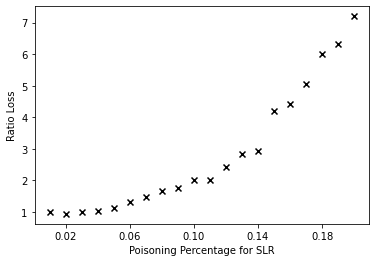

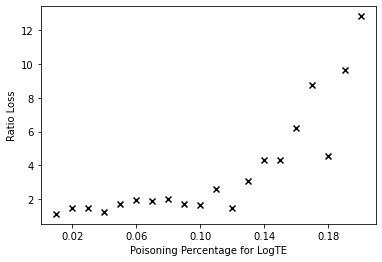

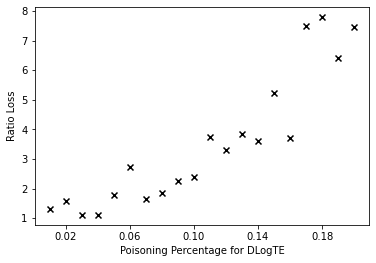

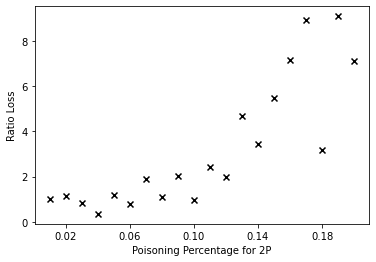

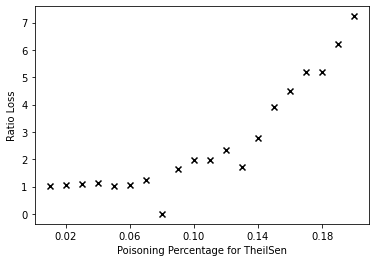

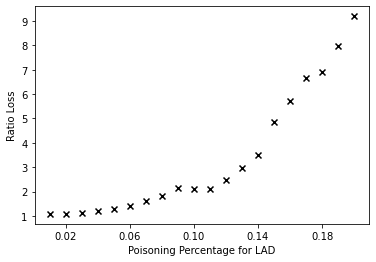

In [101]:
import matplotlib.pyplot as plt

for dataset in datasets:

    for regression in regressions:

        plt.scatter(poisoning_thresholds, ratio_loss[dataset][regression],  color='black', marker="x")
        plt.xticks(np.arange(0.02, 0.22, 0.04))
        plt.xlabel('Poisoning Percentage for ' + regression)
        plt.ylabel('Ratio Loss')
        plt.show()